# Part I - Loan Data from Prosper
## by Shamma'a Alsomaikhi

## Introduction
> The Loan Data from Prosper dataset comprises 113,937 loans, each with 81 variables. These variables include loan amount, borrower rate (interest rate), current loan status, borrower income, and various other attributes.

## Preliminary Wrangling

In [167]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [168]:
df = pd.read_csv('prosperLoanData.csv')
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [170]:
# high-level overview of data shape and composition
print(df.shape)
print('---------------------')
print(df.dtypes)

(113937, 81)
---------------------
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [171]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### The structure of the dataset?

Entries: The dataset contains 113,937 rows or entries, each representing a specific instance or record.

Columns: There are 81 columns containing different types of information about each entry.

Column Types:
- bool: 3 columns are of boolean type.
- float64: 50 columns are of floating-point numerical data type.
- int64: 11 columns are of integer numerical data type.
- object: 17 columns are of object data type, which can include strings or mixed data types.

Column Names:
Columns include various attributes such as 'ListingKey', 'ListingNumber', 'LoanStatus', 'BorrowerRate', 'EmploymentStatus', 'IncomeRange', 'LoanOriginalAmount', 'Investors', and many others.
These columns hold diverse information, including borrower details, loan characteristics, financial information, and loan performance metrics.

Non-Null Counts: The number of non-null values in each column varies. Some columns contain null or missing values, denoted by 'NaN' or 'None'.

Data dictionary: [Click here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

### What is/are the main feature(s) of interest in your dataset?

  - Is there a correlation borrower's income range and the loan amount?
  - Is there a correlation between Borrower Rate and Prosper Score ?
  - What is the distribution of loan categories in the dataset?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

LoanStatus: This variable will be crucial for analyzing the loan outcomes and understanding the current status of each loan.

BorrowerAPR: This feature will provide insights into the borrower's Annual Percentage Rate, which can be helpful in understanding the cost of borrowing for different loans.

ProsperRating (numeric) and ProsperRating (Alpha): These variables can help analyze the impact of the Prosper Rating on loan outcomes. You can explore how different ratings correlate with loan status and other factors of interest.

StatedMonthlyIncome: This feature will allow you to examine the borrower's stated monthly income and its relationship with loan amounts, loan status, or other variables.

EmploymentStatus and EmploymentStatusDuration: These variables can help analyze the impact of employment status and duration on loan outcomes. You can explore how different employment statuses and durations relate to loan status or other factors.

Occupation: This variable can provide insights into the borrowers' occupations and their potential influence on loan outcomes.

IncomeRange: This feature will allow you to analyze the distribution of borrowers across different income ranges and its relationship with loan outcomes.

ListingCategory: This variable can help you understand the distribution of loans across different categories and explore how loan category relates to other factors of interest.

By analyzing these features, you can gain insights into the relationship between borrower characteristics, loan terms, and loan outcomes.

## Univariate Exploration


In [172]:
def countplot(col): 
    plt.subplots(figsize=(35, 10)) 
    sb.countplot(x = col, data = df)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    print(df[col].value_counts())

In [173]:
def countplotBig(col):
    plt.figure(figsize=(20, 16))
    sb.countplot(y=col, data=df)
    plt.xticks(rotation=45)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()
    print(df[col].value_counts())

#### Take a copy of the dataset

In [174]:
# before editing on the dataset let's have copy of the original dataset
df_original = df.copy()

#### Duplicate entries

Both the ListingKey, ListingNumber and LoanKey are unique identifiers, necessitating a thorough check to ensure the absence of any duplicate entries.

In [175]:
print("Number of duplicate Listing Key:", df['ListingKey'].count() - df.ListingKey.nunique())

Number of duplicate Listing Key: 871


In [176]:
df.drop_duplicates(subset='ListingKey', keep='last', inplace=True) 
print("Number of duplicate Listing Key:", df['ListingKey'].count() - df.ListingKey.nunique())

Number of duplicate Listing Key: 0


In [177]:
print("Number of duplicate Listing number:", df['ListingNumber'].count() - df.ListingNumber.nunique())

Number of duplicate Listing number: 0


In [178]:
print("Number of duplicate Loan Key:", df['LoanKey'].count() - df.LoanKey.nunique())

Number of duplicate Loan Key: 0


#### Attributes selection

- LoanKey: Unique key for each loan. This is the same key that is used in the API.
- StatedMonthlyIncome: Continuous - Monthly income declared by the borrower.
- LoanOriginalAmount: Continuous - The original amount of the loan.
- EmploymentStatus: Categorical - Employment status of the borrower.
- Occupation: Categorical - Occupation selected by the borrower.
- LoanStatus: Categorical - The current status of the loan.
- IncomeRange: The income range of the borrower at the time the listing was created.
- EmploymentStatus The employment status of the borrower at the time they posted the listing.
- Term: The length of the loan expressed in months.
- LoanStatus:	The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, - - - FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- LoanOriginationDate: The date the loan was originated.
- ClosedDate:	Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses.
- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- BorrowerRate: The Borrower's interest rate for this loan.

For the loan category distribution, the following attribute might be particularly relevant:
- ListingCategory (numeric): Categorical - Category of the listing selected by the borrower.

In [179]:
columns = ['LoanKey', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'EmploymentStatus', 'Occupation', 'LoanStatus',
          'IncomeRange', 'Term', 'LoanOriginationDate','ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'ListingCategory (numeric)']
df = df[columns].copy()

In [180]:
# reanem ListingCategory (numeric) to ListingCategory
df.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   LoanKey              113066 non-null  object 
 1   StatedMonthlyIncome  113066 non-null  float64
 2   LoanOriginalAmount   113066 non-null  int64  
 3   EmploymentStatus     110811 non-null  object 
 4   Occupation           109537 non-null  object 
 5   LoanStatus           113066 non-null  object 
 6   IncomeRange          113066 non-null  object 
 7   Term                 113066 non-null  int64  
 8   LoanOriginationDate  113066 non-null  object 
 9   ClosedDate           55076 non-null   object 
 10  BorrowerAPR          113041 non-null  float64
 11  BorrowerRate         113066 non-null  float64
 12  ProsperScore         83982 non-null   float64
 13  ListingCategory      113066 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 12.9+ MB


In [181]:
# change date columns to dates types
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)
df.ClosedDate = pd.to_datetime(df.ClosedDate)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   LoanKey              113066 non-null  object        
 1   StatedMonthlyIncome  113066 non-null  float64       
 2   LoanOriginalAmount   113066 non-null  int64         
 3   EmploymentStatus     110811 non-null  object        
 4   Occupation           109537 non-null  object        
 5   LoanStatus           113066 non-null  object        
 6   IncomeRange          113066 non-null  object        
 7   Term                 113066 non-null  int64         
 8   LoanOriginationDate  113066 non-null  datetime64[ns]
 9   ClosedDate           55076 non-null   datetime64[ns]
 10  BorrowerAPR          113041 non-null  float64       
 11  BorrowerRate         113066 non-null  float64       
 12  ProsperScore         83982 non-null   float64       
 13  ListingCategor

In [182]:
#save dataset
df.to_csv('prosperLoanDataClean.csv', index=False)

#### check values

A countplot is a great way to visually explore the distribution of values in a column and understand their frequencies. The countplots below have been employed to comprehend the dataset:

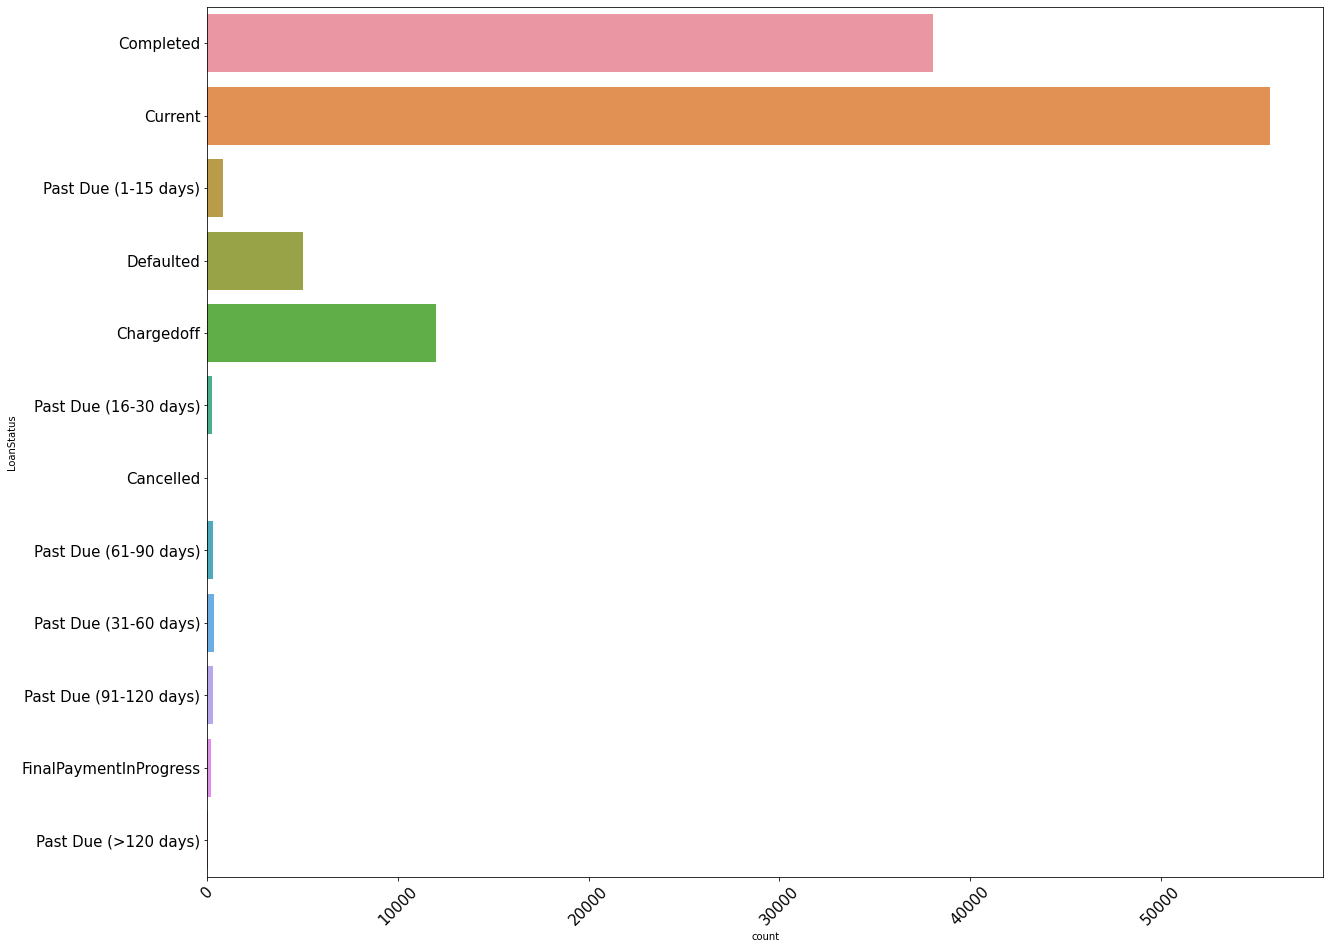

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64


In [183]:
countplotBig('LoanStatus')

The most prevalent loan status in this dataset is "Current," followed by "Completed"

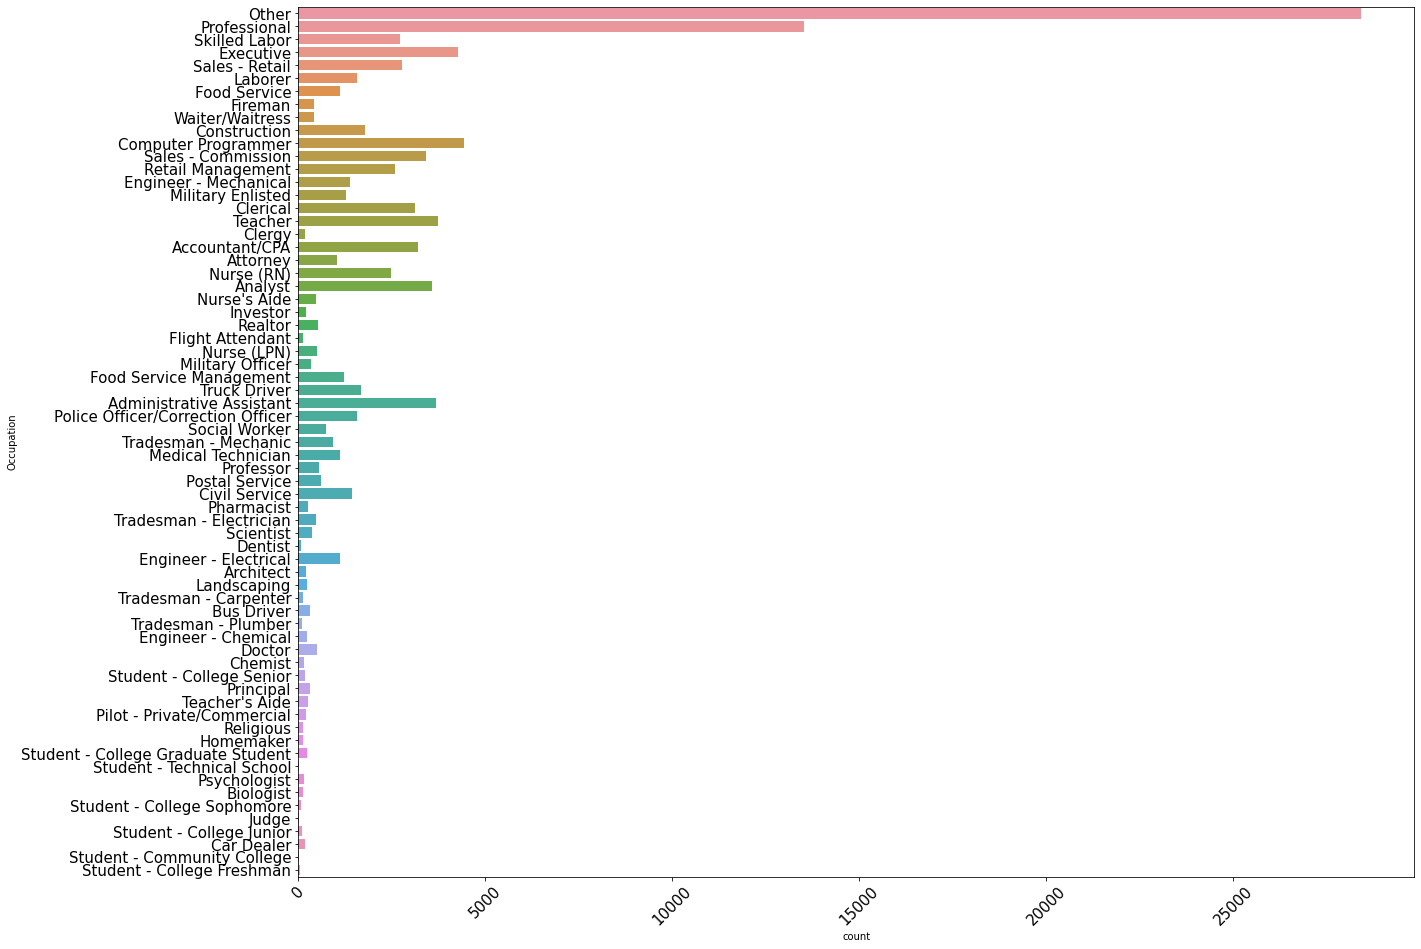

Other                          28422
Professional                   13531
Computer Programmer             4442
Executive                       4280
Teacher                         3729
                               ...  
Dentist                           67
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64


In [184]:
countplotBig('Occupation')

The most prevalent Occupation in this dataset is "Other," followed by "Professional"

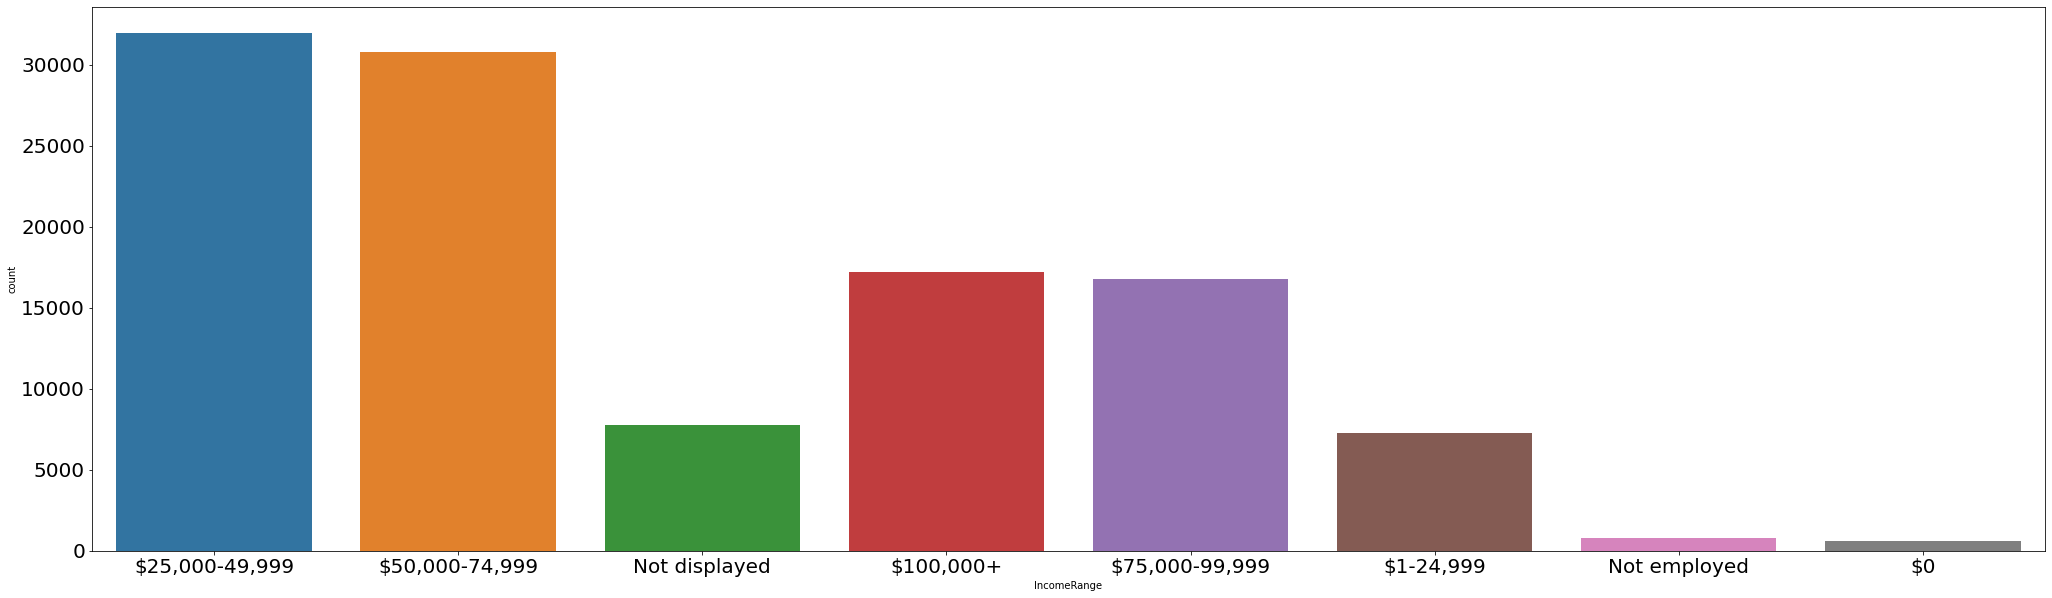

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64


In [185]:
countplot('IncomeRange')

Since $0 and Not employed are the same, I will combine them:

In [215]:
df.loc[df['IncomeRange'] == '$0', 'IncomeRange'] = 'Not employed'

In [216]:
# IncomeRange as ordered categorical vars
var_dict = {'IncomeRange': ['Not displayed', 'Not employed', '$1-24,999', 
                           '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}
for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories = var_dict[var])
    df[var] = df[var].astype(ordered_var)

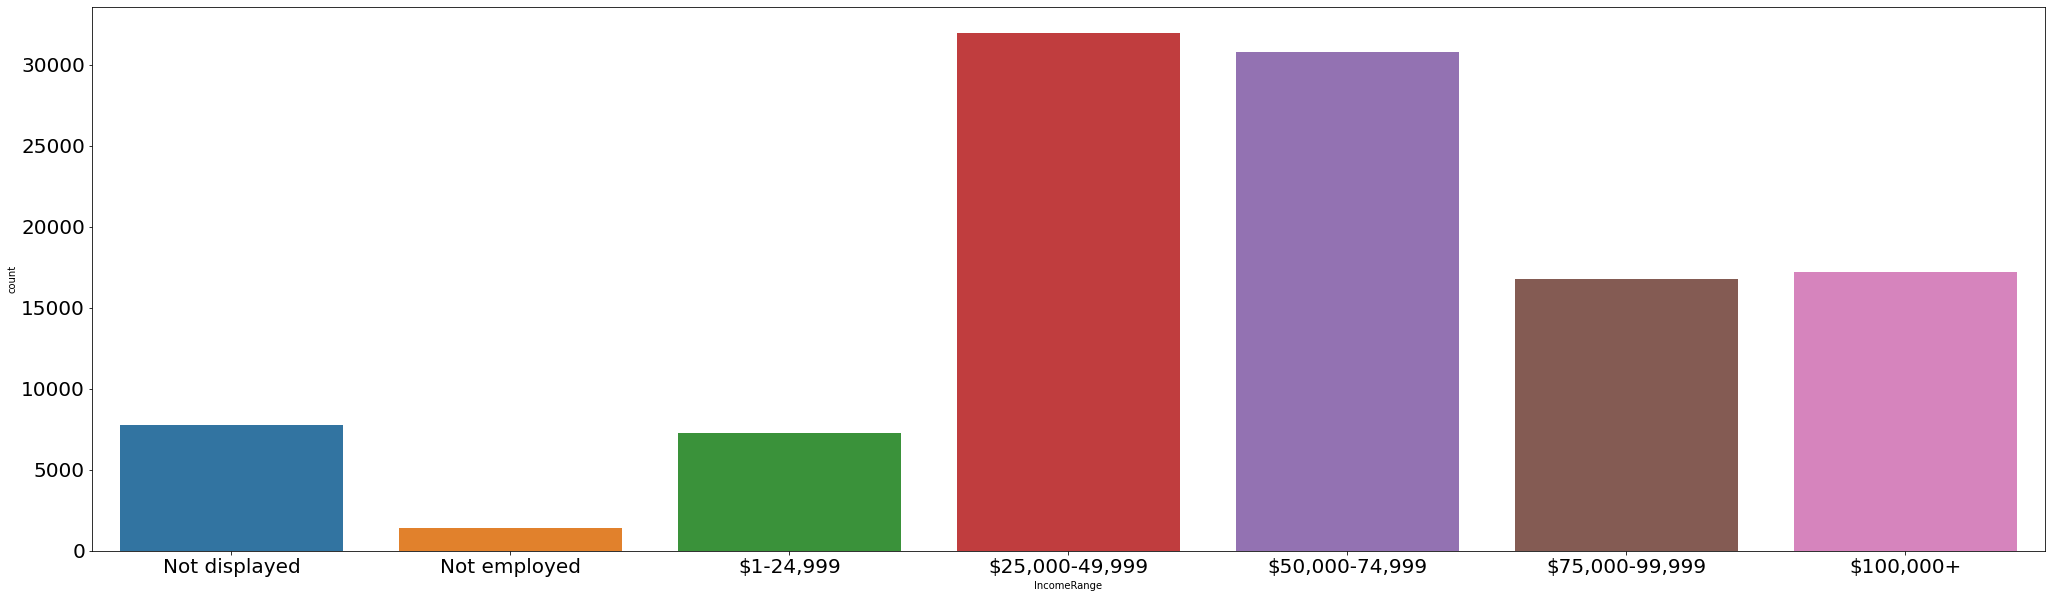

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed       1427
Name: IncomeRange, dtype: int64


In [217]:
countplot('IncomeRange')

The most prevalent Income Range in this dataset is "$25,000-49,999," followed by "$50,000-74,999"

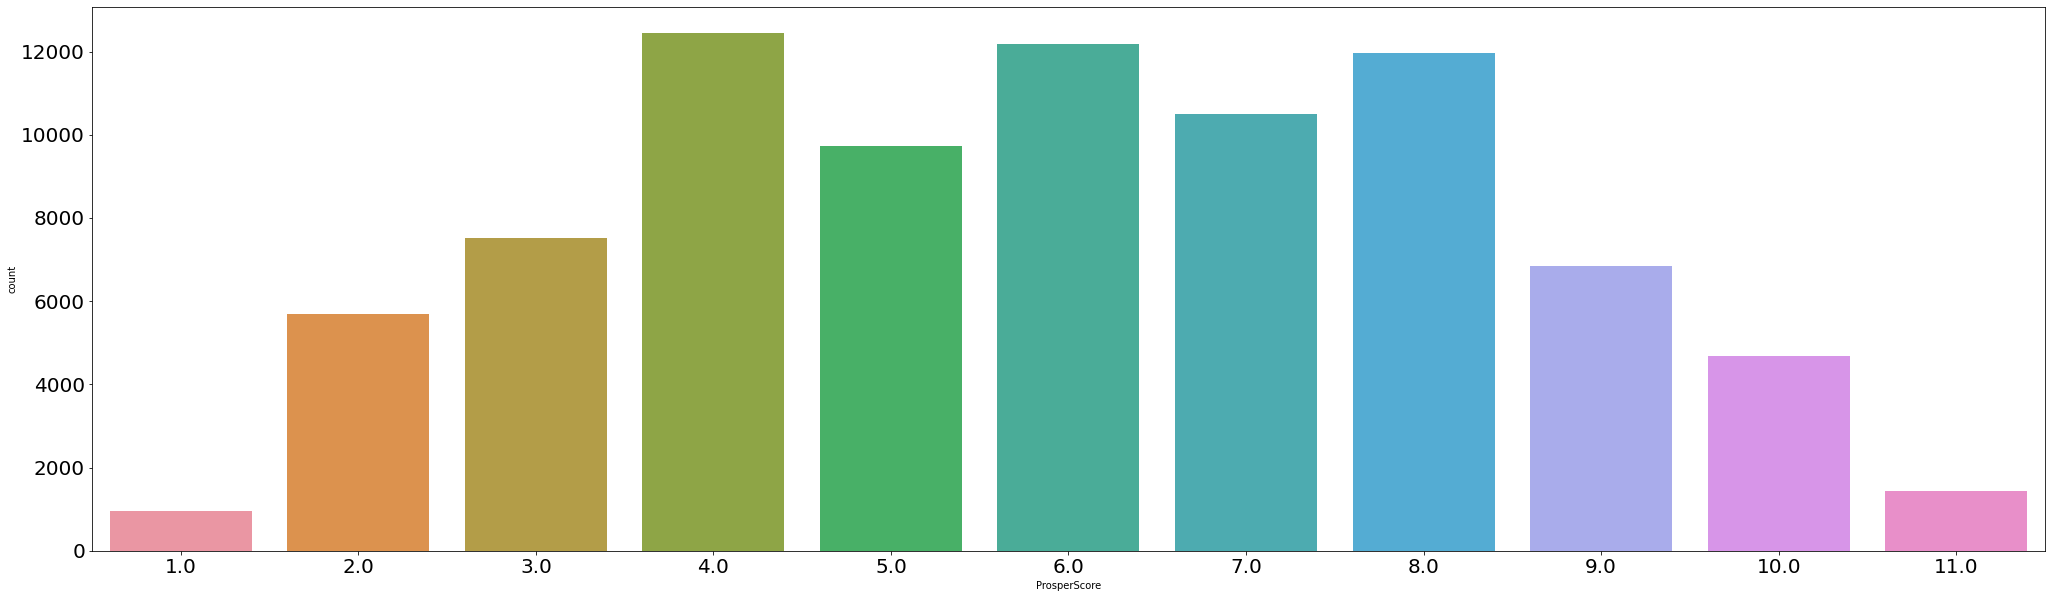

4.0     12444
6.0     12177
8.0     11970
7.0     10496
5.0      9735
3.0      7528
9.0      6857
2.0      5688
10.0     4694
11.0     1432
1.0       961
Name: ProsperScore, dtype: int64


In [189]:
countplot('ProsperScore')

The most prevalent Prosper Score in this dataset is "4," followed by "6"

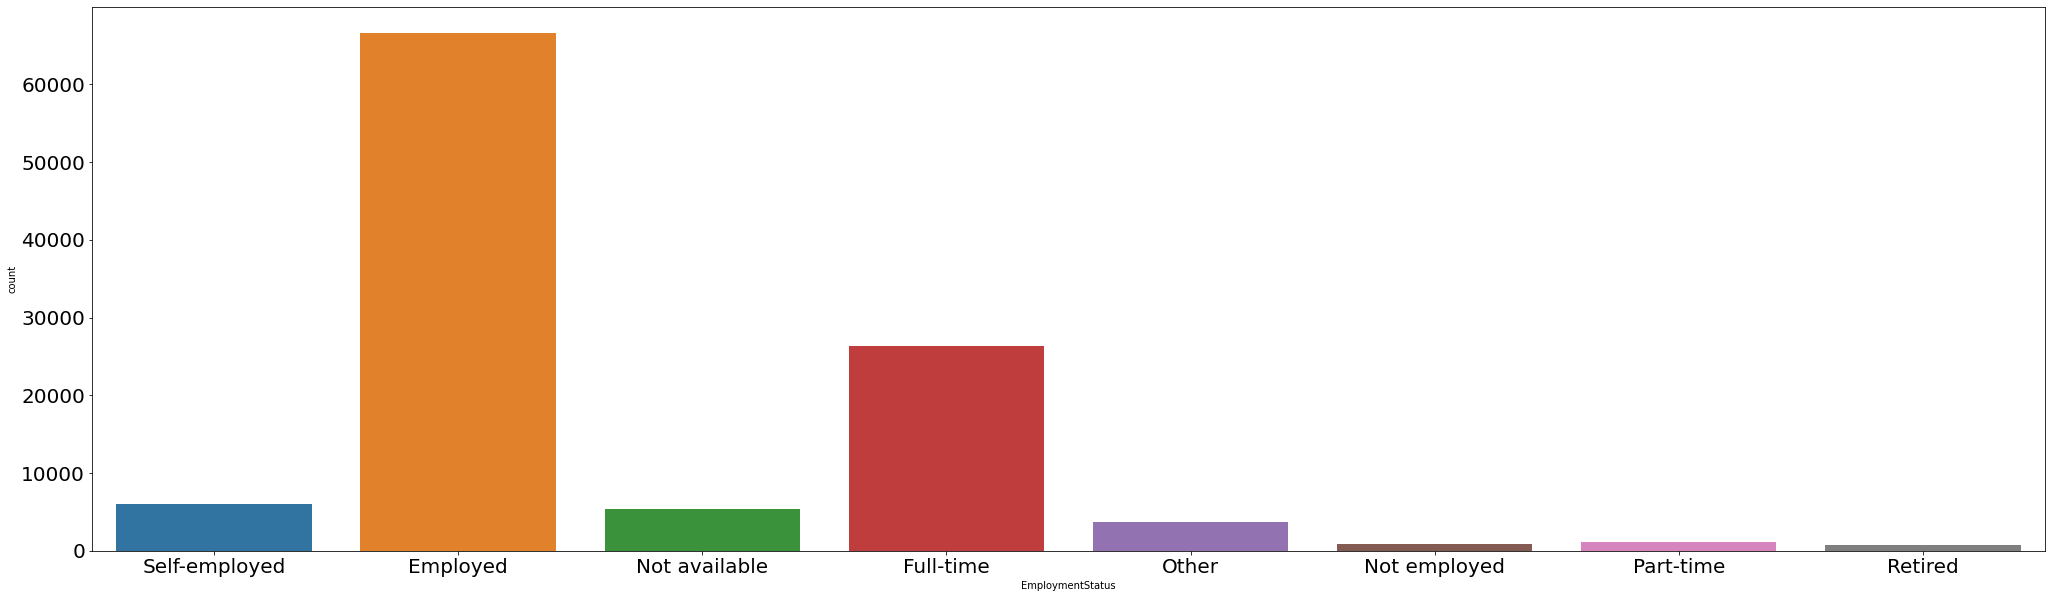

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64


In [190]:
countplot('EmploymentStatus')

The most prevalent Employment Status in this dataset is "Employed," followed by "Full-time"

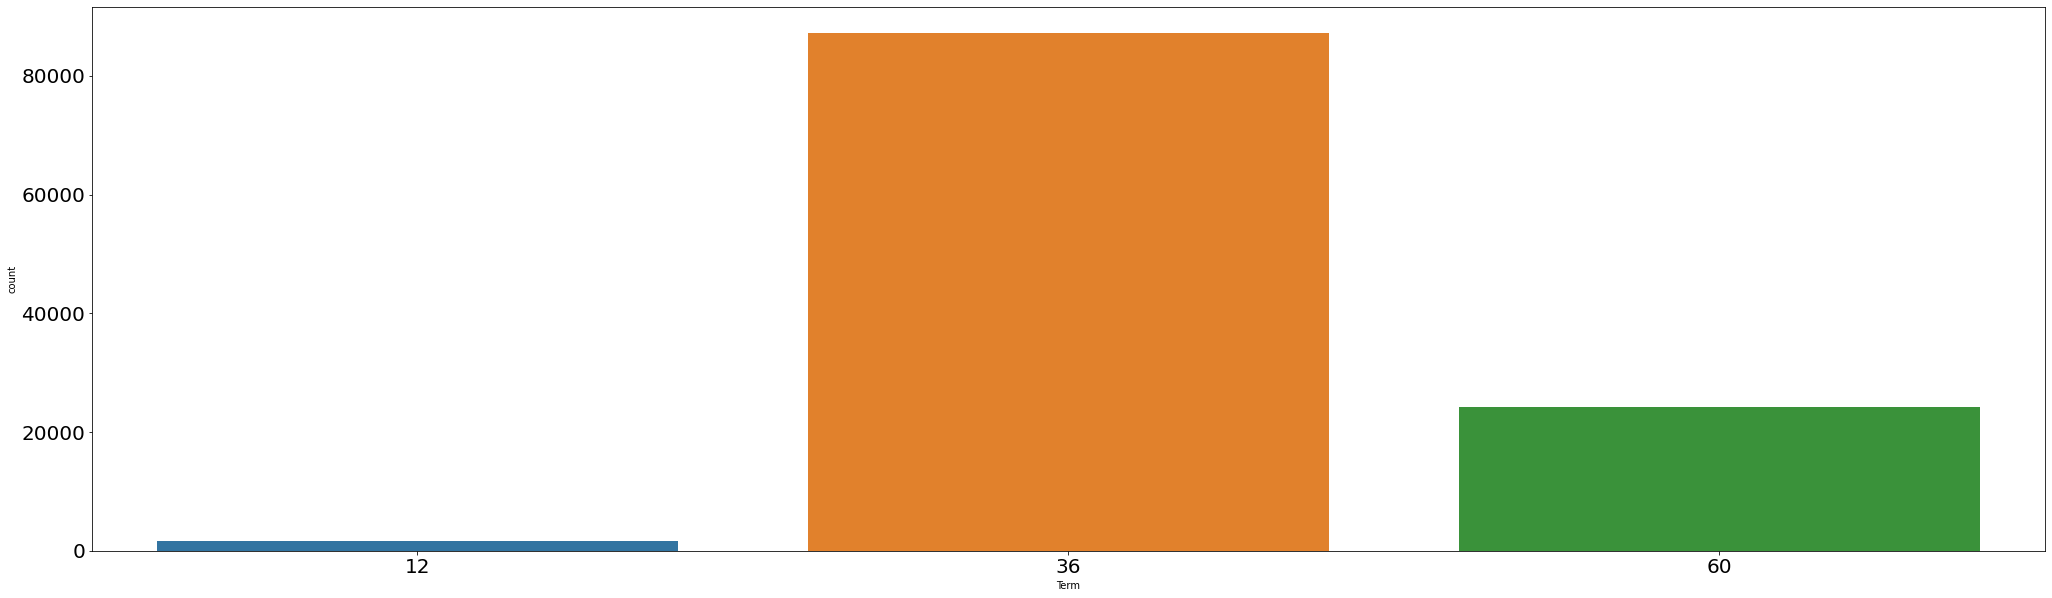

36    87224
60    24228
12     1614
Name: Term, dtype: int64


In [191]:
countplot('Term')

The most commonly chosen loan terms are 36 months, signifying a medium-term commitment, followed by 60 months for a long-term period and 12 months for short-term durations.

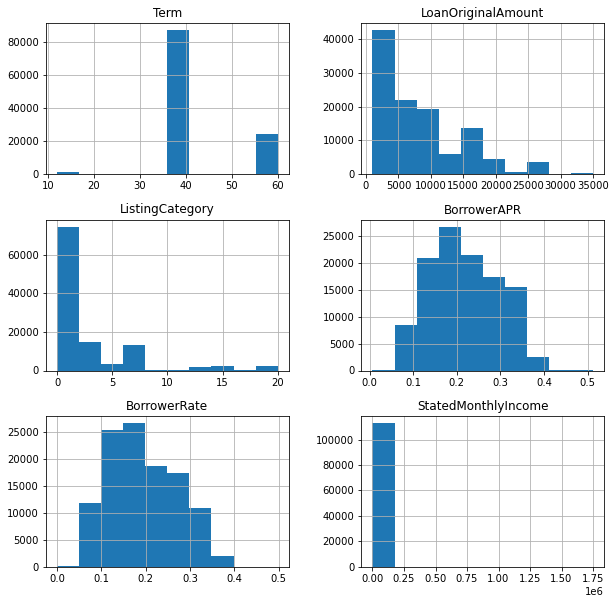

In [192]:
df.hist(['Term', 'LoanOriginalAmount', 'ListingCategory', 'BorrowerAPR', 'BorrowerRate',\
    'StatedMonthlyIncome'],\
        figsize=(10,10));

We observe a decline in the count of Loan Original Amount and BorrowerRate as we move further along the x-axis.

### Distribution of variables

> The distribution of the variables in the dataset appears to be relatively normal and does not exhibit any unusual points or outliers. After visualizing the data and calculating measures of central tendency and spread, no extreme values or data points that significantly deviate from the rest of the distribution were identified. Therefore, no transformations or adjustments were necessary for this analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [193]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
categoric_vars = ['EmploymentStatus', 'IncomeRange', 'ProsperScore']

In [194]:
def scatter(x,y):
   
    # Create the scatter plot
    plt.figure(figsize=(10,10))
    plt.scatter(df[x], df[y])

    # Set labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Relationship between {0} and {1}'.format(x, y))

    # Show the plot
    plt.show()

In [195]:
def boxplot(x,y):
    df.boxplot(column= y, by= x, figsize=(22, 8))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

Loans.shape= (113066, 14)
Loans_sample.shape= (500, 14)


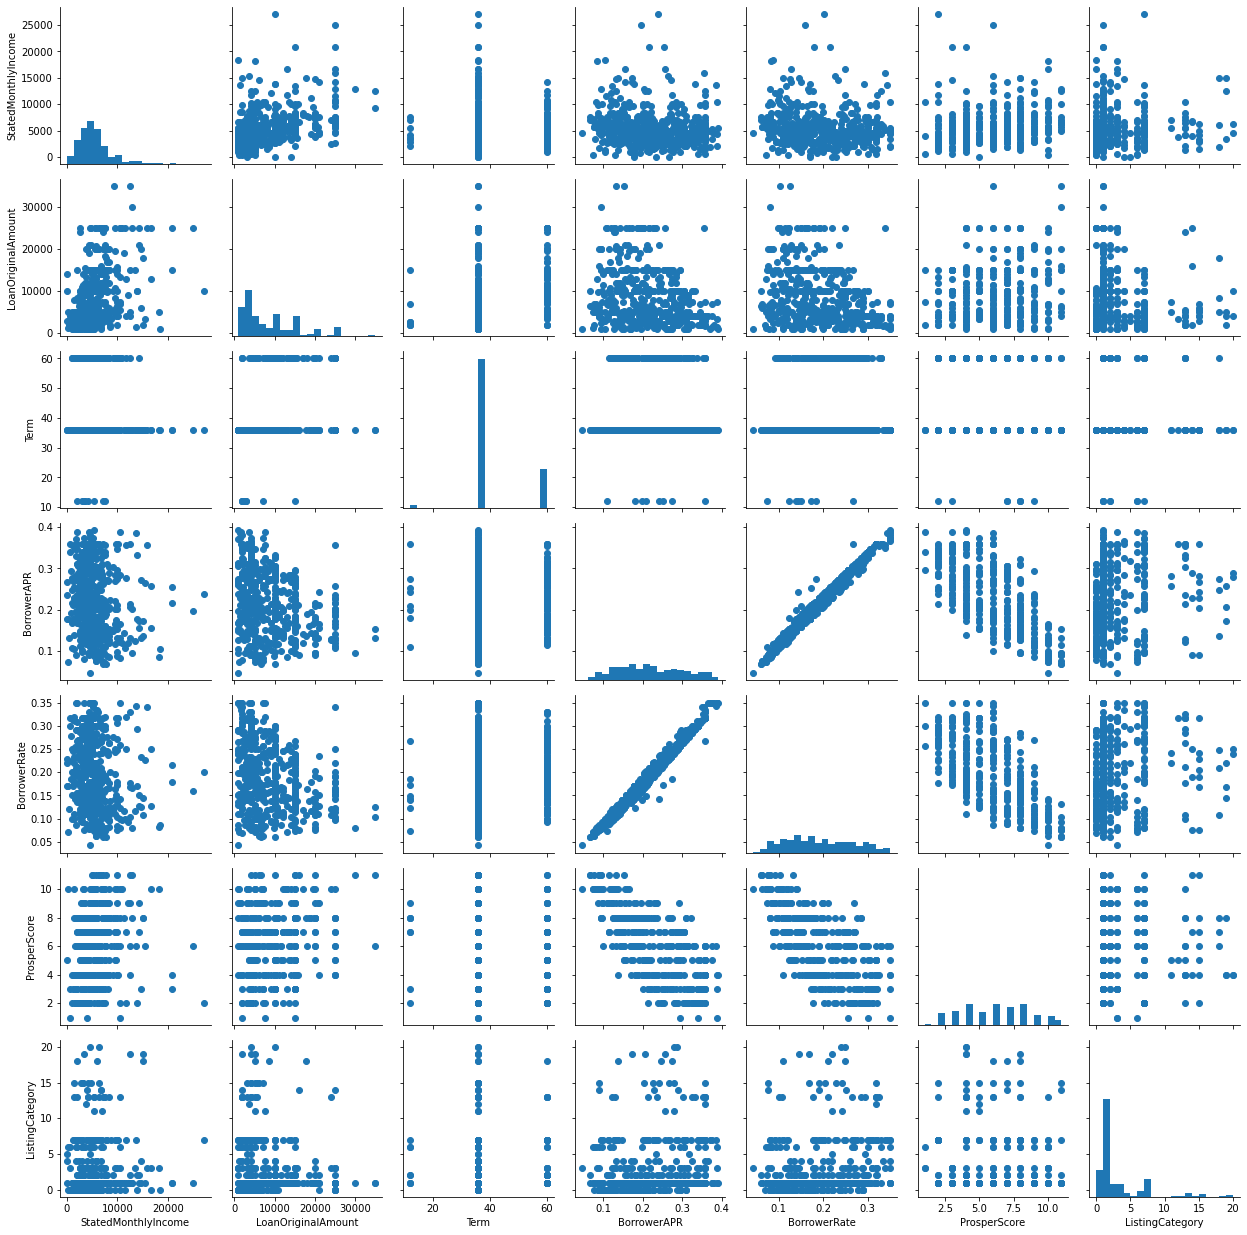

In [196]:
# plot matrix: sample 500 Loans so that plots are clearer and they render faster
print("Loans.shape=",df.shape)
loans_samp = df.sample(n=500, replace = False)
print("Loans_sample.shape=",loans_samp.shape)

g = sb.PairGrid(data = loans_samp, vars = numerical_columns)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

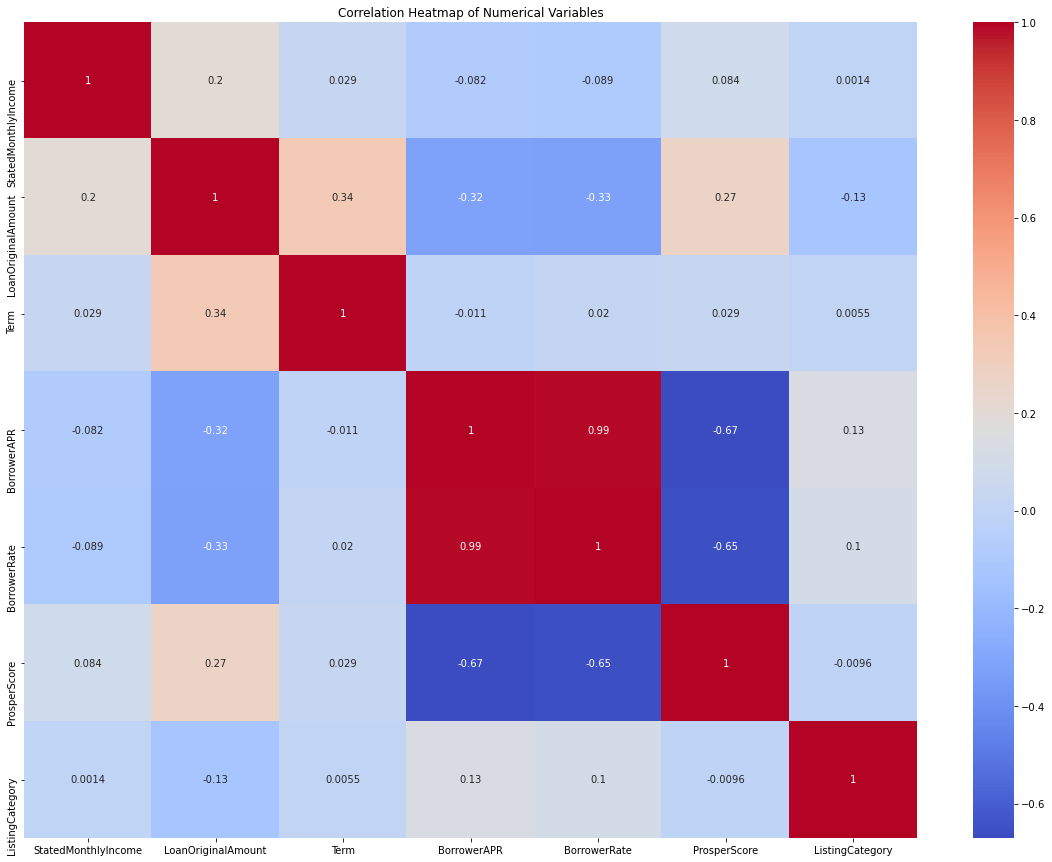

In [197]:
# Calculating the correlation matrix
correlation_matrix = numerical_columns.corr()

# Creating the heatmap
plt.figure(figsize=(20, 15))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

- The correlation between BorrowerAPR and BorrowerRate is 0.99, indicating a strong positive correlation. This suggests that as the BorrowerAPR increases, the BorrowerRate also tends to increase significantly.

- Stated Monthly Income and Loan Original Amount exhibit a 0.20 correlation, signifying a moderately positive relationship. As the monthly income rises, there is a moderate increase in the loan amount.

- The correlation between BorrowerAPR and Loan Original Amount is -0.32, representing a moderately negative correlation. This implies that as the loan amount increases, the BorrowerAPR tends to decrease, and conversely, as the BorrowerAPR increases, the loan amount decreases.

- The correlation between BorrowerAPR and ProsperScore is -0.67, representing a moderately negative correlation. This implies that as the ProsperScore, the BorrowerAPR tends to decrease, and conversely, as the BorrowerAPR increases, the ProsperScore.

Further investigation into the correlation between numerical variables, such as BorrowerAPR, BorrowerRate, Stated Monthly Income, and Loan Original Amount, may provide additional insights into their interrelationships.

<Figure size 1440x1440 with 0 Axes>

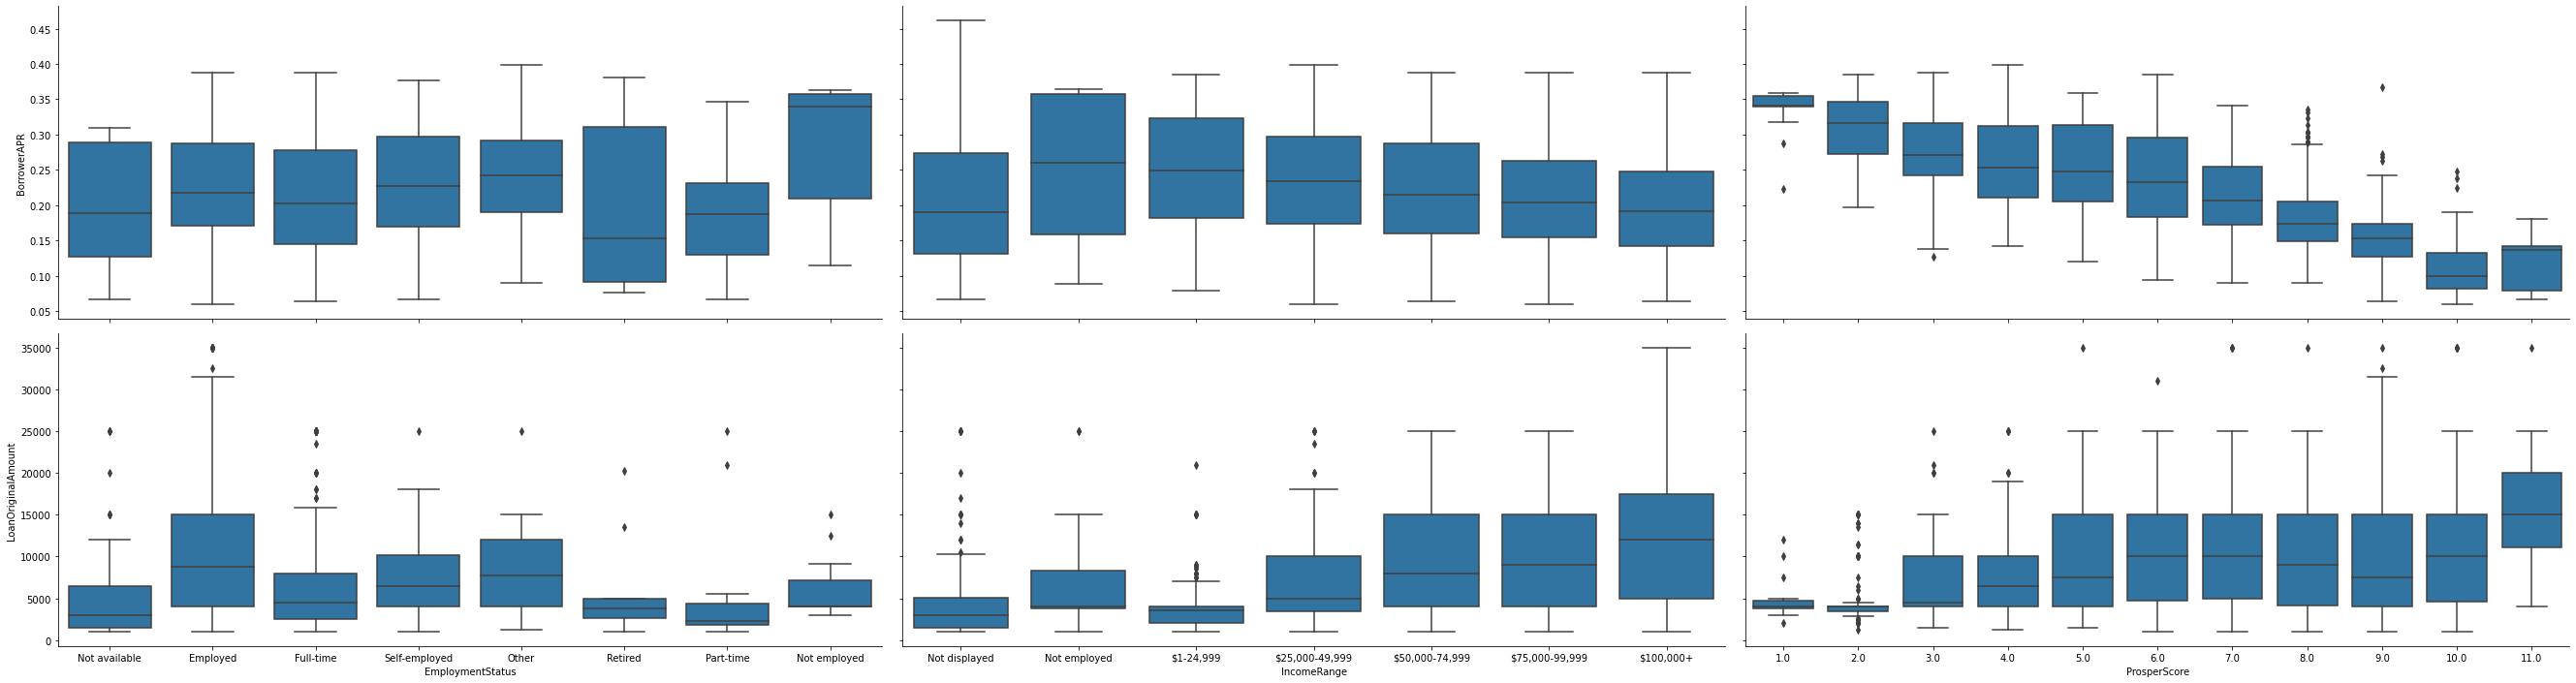

In [198]:
loans_samp = df.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = loans_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], x_vars = categoric_vars,
                height = 5, aspect = 2.5)
g.map(boxgrid)
plt.show();

There exist negative associations between certain categorical variables and numerical variables. Borrowers with lower ratings generally exhibit higher BorrowerAPR rates, while those with higher ratings tend to have lower BorrowerAPR rates. Similarly, individuals with lower income levels typically experience higher BorrowerAPR rates, while those with higher incomes tend to encounter lower BorrowerAPR rates.

Conversely, a positive relationship is observed between Income Range and Loan Amount. Borrowers with higher incomes are inclined to borrow larger sums compared to those with lower incomes. Additionally, borrowers with higher Prosper score ratings tend to qualify for larger loan amounts than their counterparts with lower Prosper score ratings.

Further exploration into the relationships among categorical and numerical variables may unveil additional patterns and insights:

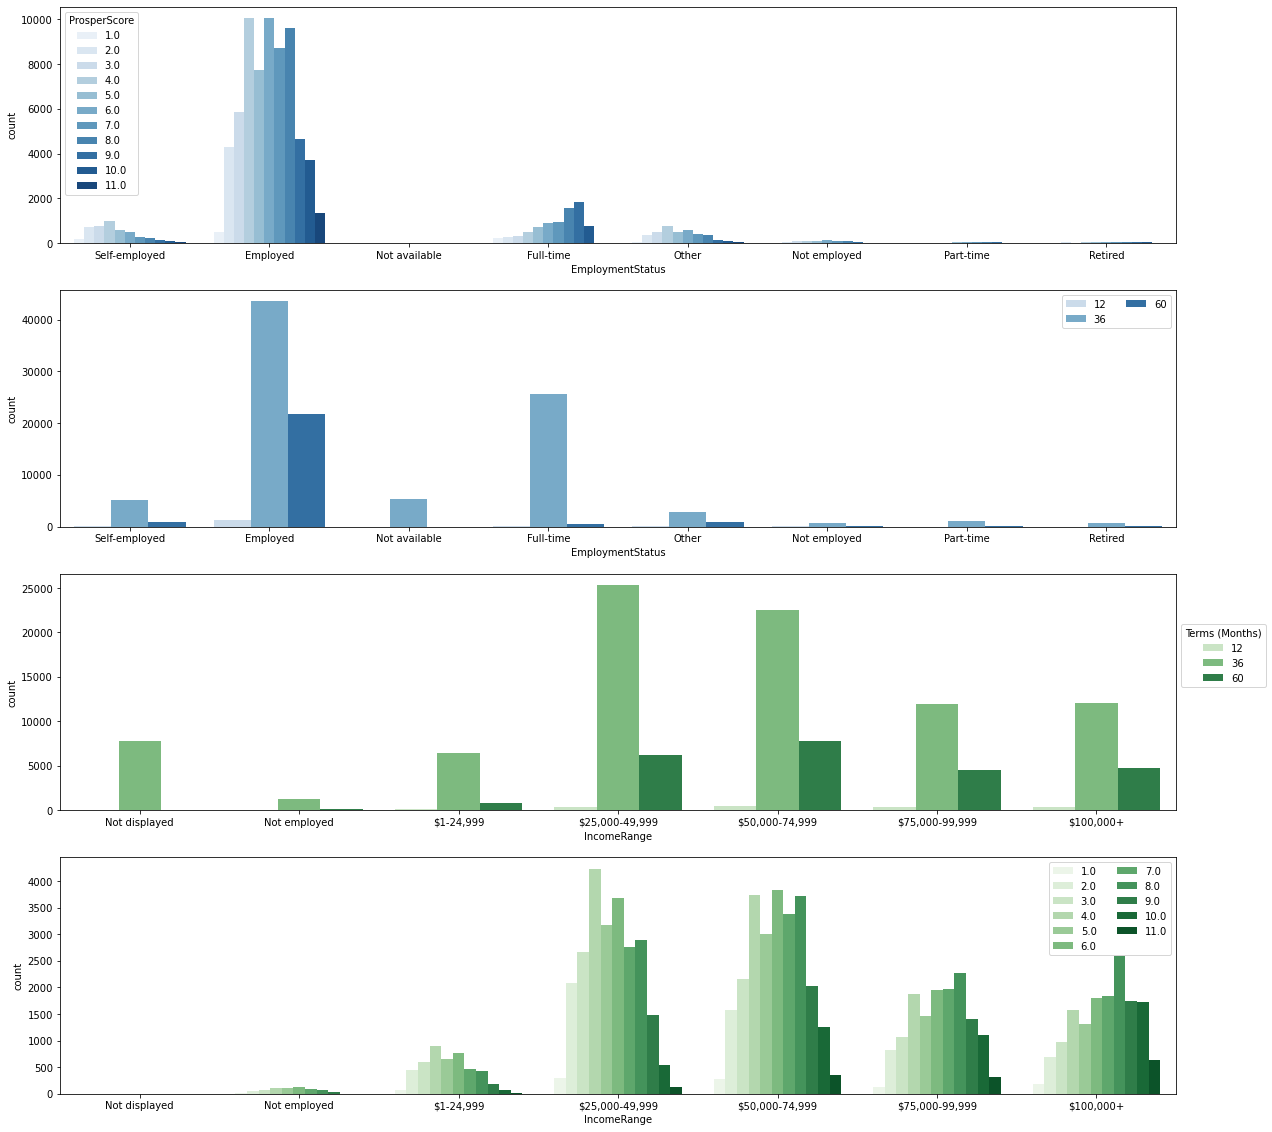

In [199]:
plt.figure(figsize = [20, 20])

# subplot 1: EmploymentStatus vs ProsperScore
plt.subplot(4, 1, 1)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'ProsperScore', palette = 'Blues')

# subplot 2: EmploymentStatus vs. Term
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
ax.legend(ncol = 2) 

# subplot 3: IncomeRange vs. Term
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df, x = 'IncomeRange', hue = 'Term', palette = 'Greens')
plt.legend(loc = 3, bbox_to_anchor = (1.0, 0.5), title='Terms (Months)');

# subplot 3: IncomeRange vs. ProsperScore
ax = plt.subplot(4, 1, 4)
sb.countplot(data = df, x = 'IncomeRange', hue = 'ProsperScore', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) 


plt.show()

Most people who borrow from Prosper have jobs, and many of them don't have the highest ratings. Among those with jobs, most prefer the 36-month loan option. Apart from people with jobs, there isn't much connection with their job status.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


In [200]:
def scatterplot(x, y):
    plt.figure(figsize=[8,6])
    sb.regplot(data=df, x= x, y= y, scatter_kws={'alpha': 1/10})
    plt.show()

In [201]:
def boxplot(x,y):
    sb.boxplot(x=x, y=y, data=df)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

- A negative correlation between the loan amount and Borrower APR:

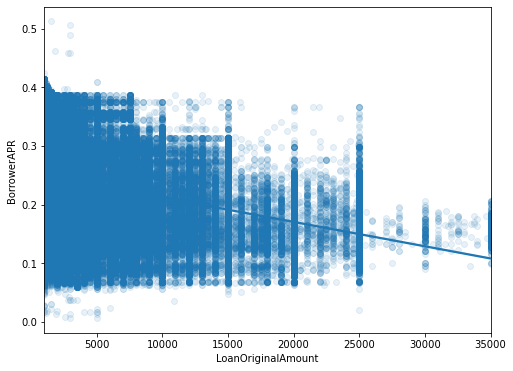

In [202]:
scatterplot('LoanOriginalAmount', 'BorrowerAPR')

- A negative correlation between the Prosper Score and Borrower APR:

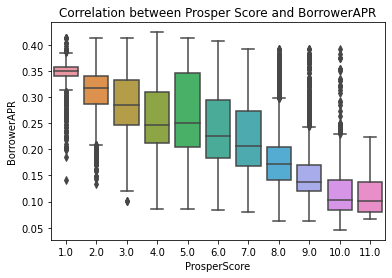

In [203]:
sb.boxplot(x='ProsperScore', y='BorrowerAPR', data=df)
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR')
plt.title('Correlation between Prosper Score and BorrowerAPR')
plt.show()

- A postive correlation between the Borrower Rate and Borrower APR:

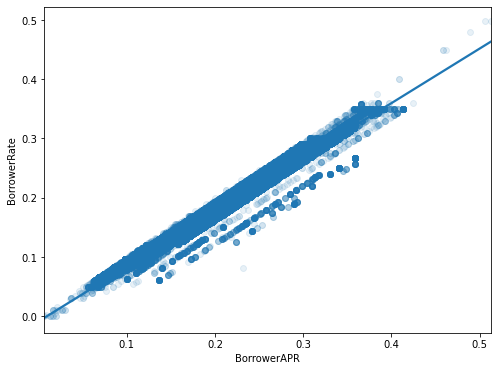

In [204]:
scatterplot('BorrowerAPR', 'BorrowerRate')

- There is a moderately positive correlation observed between Stated Monthly Income and Loan Original Amount:

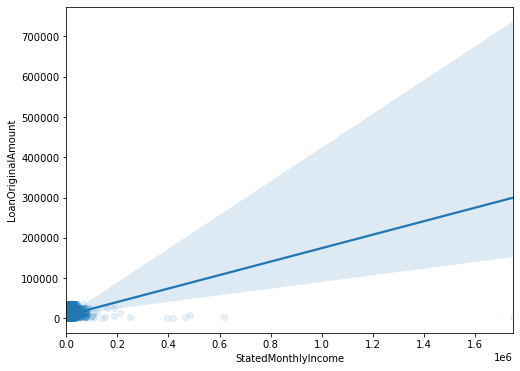

In [205]:
scatterplot('StatedMonthlyIncome', 'LoanOriginalAmount')

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- BorrowerAPR and ProsperScore have negative correlation:

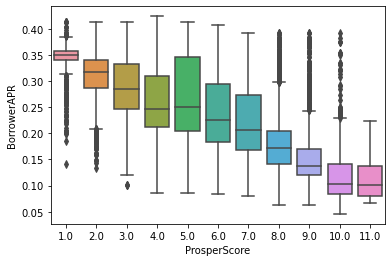

In [206]:
boxplot('ProsperScore','BorrowerAPR')

- LoanOriginalAmount and ProsperScore have positive correlation:

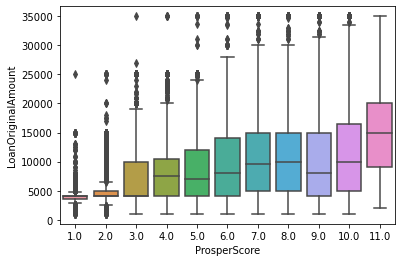

In [207]:
boxplot('ProsperScore','LoanOriginalAmount')

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [208]:
def boxplot(x, y, hue, title, legend):
    fig = plt.figure(figsize = [10, 8])
    ax = sb.boxplot(x=x, y=y, hue= hye, data=df, palette="Set3")
    plt.title(title)
    plt.legend(title = legend);

- Is there a correlation between the borrower's income range and the loan amount?

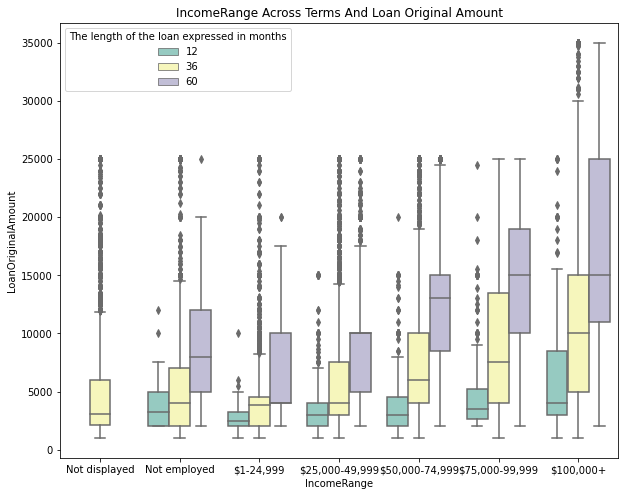

In [209]:
fig = plt.figure(figsize = [10, 8])
ax = sb.boxplot(x='IncomeRange', y='LoanOriginalAmount', hue='Term',
                 data=df, palette="Set3")
plt.title('IncomeRange Across Terms And Loan Original Amount')
plt.legend(title = 'The length of the loan expressed in months');

It appears that individuals with a higher income range tend to secure larger loans with longer terms.

- Is there a correlation between Borrower Rate and Prosper Score ?


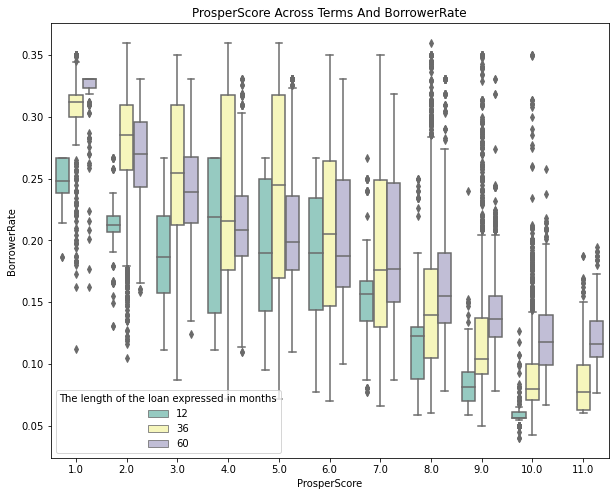

In [210]:
fig = plt.figure(figsize = [10, 8])
ax = sb.boxplot(x='ProsperScore', y='BorrowerRate', hue='Term',
                 data=df, palette="Set3")
plt.title('ProsperScore Across Terms And BorrowerRate')
plt.legend(title = 'The length of the loan expressed in months');

The higher the Prosper Score, the lower the BorrowerRate tends to be.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- A higher income range tend to secure larger loans with longer terms.




- A negative correlation between the Prosper Score and Borrower Rate:

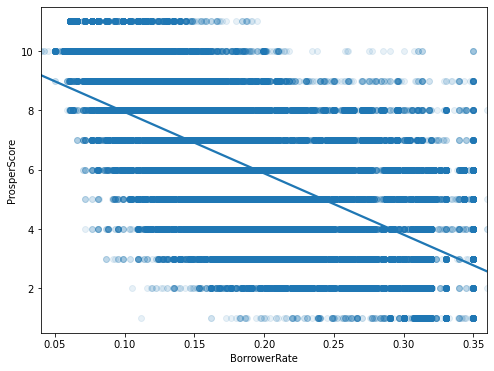

In [211]:
scatterplot('BorrowerRate','ProsperScore')

### Were there any interesting or surprising interactions between features?

> The relationship between Prosper Score and loan term indicates that individuals with scores 1 and 2 typically opt for shorter terms. As Prosper Scores increase, the loan term tends to grow. However, for scores 9 and 10, the term starts decreasing again.

## Conclusions

- The main features of interest include exploring the correlation between the borrower's income range and the loan amount, investigating the relationship between Borrower Rate and Prosper Score, and analyzing the distribution of loan categories.

- Loan terms are predominantly 36 months (medium-term), followed by 60 months (long-term) and 12 months (short-term).

- Most borrowers are employed, with the majority having lower ratings. Among employed borrowers.

- A strong positive correlation exists between BorrowerAPR and BorrowerRate.

- Stated Monthly Income and Loan Original Amount exhibit a moderately positive correlation.

- The correlation between BorrowerAPR and Loan Original Amount is moderately negative.

- BorrowerAPR and ProsperScore show a moderately negative correlation.

- A negative correlation is observed between Prosper Score and Borrower Rate.

- Individuals with a higher income range tend to secure larger loans with longer terms.


